In [20]:
import os
import sys
print(os.getcwd())
sys.path.append("../WanPy")

from WanPy import *
from pythtb import *
from pythTB_wan import Bloch, K_mesh, Wannier, Lattice
import models
import plotting as plot

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm

/Users/treycole/Codes/WanPy/top_obstruction


## Haldane band structure

(<Figure size 640x480 with 2 Axes>, <Axes: ylabel='Energy $E(\\mathbf{{k}})$'>)

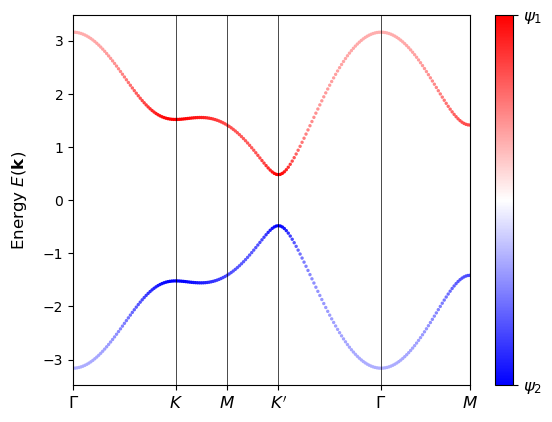

In [43]:
### geometry of model ###
n_super_cell = 1
ref_model = models.Haldane(1, 1, 1).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

n_orb = ref_model.get_num_orbitals()
lat_vecs = ref_model.get_lat()
orb_vecs = ref_model.get_orb()

n_occ = int(n_orb/2)
low_E_sites = np.arange(0, n_orb, 2)
high_E_sites = np.arange(1, n_orb, 2)

fig, axs = plt.subplots(1, 1, gridspec_kw={'hspace':0.1}, sharex=True)

### plot bands ###
k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')

delta = 1
t = -1
n_super_cell = 1

# trivial bands
t2_triv = -0.1
model_triv = models.Haldane(delta, t, t2_triv).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
eigstates_triv = Bloch(model_triv, 20, 20)
eigstates_triv.solve_model()
eigstates_triv.plot_bands(
    k_path, k_label=label, nk=201, sub_lat=True, scat_size=2, red_lat_idx=high_E_sites, fig=fig, ax=axs
    )

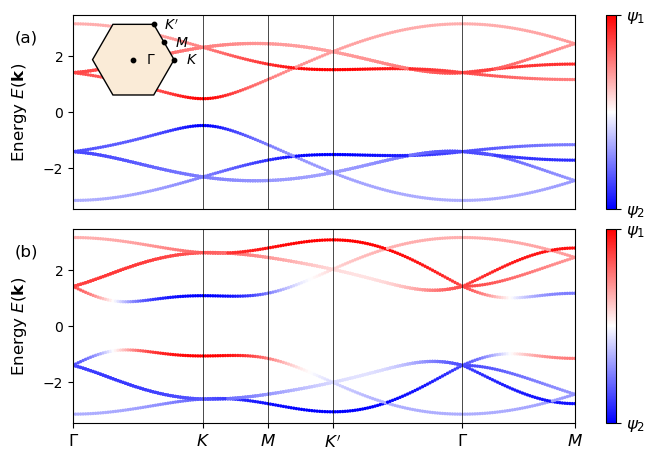

In [38]:
### geometry of model ###
n_super_cell = 2
ref_model = models.Haldane(1, 1, 1).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

n_orb = ref_model.get_num_orbitals()
lat_vecs = ref_model.get_lat()
orb_vecs = ref_model.get_orb()

n_occ = int(n_orb/2)
low_E_sites = np.arange(0, n_orb, 2)
high_E_sites = np.arange(1, n_orb, 2)

fig, axs = plt.subplots(2, 1, gridspec_kw={'hspace':0.1}, sharex=True)

### plot bands ###
k_path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]]
label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$')

delta = 1
t = -1
n_super_cell = 2

# trivial bands
t2_triv = -0.1
model_triv = models.Haldane(delta, t, t2_triv).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
eigstates_triv = Bloch(model_triv, 20, 20)
eigstates_triv.solve_model()
eigstates_triv.plot_bands(
    k_path, nk=201, sub_lat=True, scat_size=2, red_lat_idx=high_E_sites, fig=fig, ax=axs[0]
    )
axs[0].xaxis.set_ticks_position('none')
axs[0].text(-.15, 2.5, '(a)', size=12)


# topological bands
t2_top = -0.4
# t2_top = -delta/(3*np.sqrt(3))  
model_top = models.Haldane(delta, t, t2_top).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
eigstates_top = Bloch(model_top, 20, 20)
eigstates_top.solve_model()
eigstates_top.plot_bands(
    k_path, nk=201, k_label=label, sub_lat=True, scat_size=2, red_lat_idx=high_E_sites, fig=fig, ax=axs[1]
    )

axs[1].text(-.15, 2.5, '(b)', size=12)
# axs[1].set_ylim(-1e-1, 1e-1)

### Brillouin zone inset ###

inset_ax = axs[0].inset_axes([-0.08, 0.57, 0.4, 0.4])  # [x0, y0, widthx, widthy]

a = 2 # Lattice constant
s = 4 * np.pi / (3 * a) # Size of the Brillouin zone
# Angles for hexagon vertices
theta = np.linspace(0, 2 * np.pi, 7)[:-1]
# Hexagon vertices
x = s * np.cos(theta)
y = s * np.sin(theta)
# Plot hexagon
inset_ax.fill(x, y, 'antiquewhite', edgecolor='k')

# high-symmetry points
lat = Lattice(ref_model)
recip_vecs = lat.get_recip_lat_vecs()
k_pts = k_path @ recip_vecs
k_path = np.array([[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0], [.5, .5]])
label = [r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $', r'$M$']
k_pts = k_path @ recip_vecs

for i in range(4):
    inset_ax.scatter(k_pts[i,0], k_pts[i,1], s=10, zorder=2, c='k')
    inset_ax.text(k_pts[i,0]+0.9, k_pts[i,1], label[i], fontsize=10, ha='center', va='center')

inset_ax.axis('equal')
inset_ax.set_xticks([])
inset_ax.set_yticks([])
inset_ax.set_axis_off()

# adjust to remove white space
plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=1.08)

save_name = f'Delta={delta}_t={t}_n_occ={n_occ}_comparison'

plt.savefig(f'images/Haldane_bands_{save_name}.png', dpi=700)

In [39]:
1/(3*np.sqrt(3))

np.float64(0.19245008972987526)